In [24]:
#import libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
from geopandas import GeoDataFrame as gp
import matplotlib.pylab as plt
import os
from fiona.crs import from_epsg
import statsmodels.api as sm
import shapely
import pysal as ps
import seaborn as sns
from matplotlib import colors

%matplotlib inline

In [25]:
shape_path="PUIDATA/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
#ct_shape.index=ct_shape.CT2010
ct_shape.to_crs(epsg=4326, inplace=True)
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


In [26]:
ct_shape.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,2.445896e+05,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,1.110063e+05,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,1.504068e+05,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,1.412966e+05,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,2.007850e+05,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...
5,50074001000,5,Staten Island,1000,007400,1.390840e+05,1540.875503,"POLYGON ((-74.0658940384365 40.59682603645464,..."
6,50075001000,5,Staten Island,1000,007500,1.235605e+05,1412.642887,POLYGON ((-74.08568983334592 40.63660727987615...
7,50077001000,5,Staten Island,1000,007700,2.057710e+05,2421.037307,POLYGON ((-74.08709163679775 40.64033437639547...
8,50112011000,5,Staten Island,1000,011201,1.961123e+05,1943.029020,POLYGON ((-74.08654141710515 40.58373352627014...
9,50112021000,5,Staten Island,1000,011202,9.273776e+04,1233.682178,POLYGON ((-74.09940090442291 40.57918675556763...


In [27]:
# Extract the Brooklyn shape polygons and convert the coordinates to lat/lon
ct_shape.columns

Index([ u'BCTCB2010',   u'BoroCode',   u'BoroName',     u'CB2010',
           u'CT2010', u'Shape_Area', u'Shape_Leng',   u'geometry'],
      dtype='object')

In [28]:
ct_shape.drop(['BCTCB2010', 'CB2010', 'Shape_Leng', 'Shape_Area'], axis=1, inplace=True)
ct_shape.head()

,BoroCode,BoroName,CT2010,geometry
0,5,Staten Island,000900,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,5,Staten Island,002001,POLYGON ((-74.07061992438021 40.61085506708748...
2,5,Staten Island,002700,POLYGON ((-74.07524403910647 40.62600632456045...
3,5,Staten Island,004000,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,5,Staten Island,006400,POLYGON ((-74.07643744511995 40.60100160658919...


In [29]:
brooklyn = ct_shape[ct_shape.BoroCode == '3']
brooklyn.reset_index(inplace=True)
brooklyn.head()

,index,BoroCode,BoroName,CT2010,geometry
0,5037,3,Brooklyn,000200,"POLYGON ((-74.00659158337982 40.6556127336851,..."
1,5038,3,Brooklyn,000301,POLYGON ((-73.99514512602698 40.69877384570529...
2,5039,3,Brooklyn,000501,"POLYGON ((-73.99270830309769 40.6980992598468,..."
3,5040,3,Brooklyn,001100,"POLYGON ((-73.9851430608965 40.69488514300315,..."
4,5041,3,Brooklyn,001500,POLYGON ((-73.98305147125492 40.69837793357372...


In [30]:
#Find the coordinates of CUSP
brooklyn_cusp = shapely.geometry.Point(-73.9866, 40.6931)

In [93]:
#Locating NYU-CUSP in brooklyn shapefile
for i in range(len("geometry")):
    if brooklyn.geometry[i].contains(brooklyn_cusp):
        shape = brooklyn.geometry[i]
        break

cusp_poly = GeoDataFrame(brooklyn.iloc[i])
print('CUSP is contained in', ('%s', '%d'), cusp_poly)

('CUSP is contained in', ('%s', '%d'),                                                           7
index                                                  5044
BoroCode                                                  3
BoroName                                           Brooklyn
CT2010                                               003000
geometry  POLYGON ((-74.02626267406126 40.64009438137105...)


In [ ]:
CUSP is contained in POLYGON 
((-73.98622595691907 40.69308831340505, -73.98627231669104 40.69219479463375, -73.98729894947923 40.69223407539823, 
-73.98725396415627 40.69312490273171, -73.98622595691907 40.69308831340505))

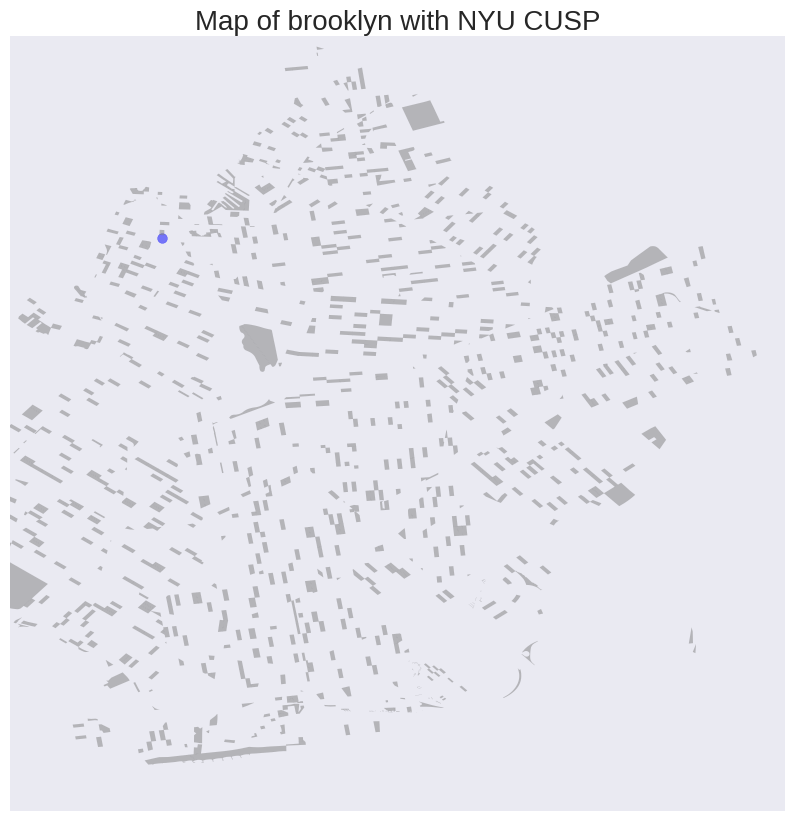

In [105]:
#Plotting data
f, ax = plt.subplots(figsize=(10,10))
brooklyn[::10].plot(ax = ax, color = 'grey', alpha = 0.5, linewidth=0.01)
cusp_poly.transpose().plot(ax = ax, color = 'red', alpha=1)
ax.set_title("Map of brooklyn with NYU CUSP", fontsize=20)
plt.xlim(-74.02,-73.85)
plt.ylim(40.56,40.74)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.scatter(brooklyn_cusp.x, brooklyn_cusp.y, color = 'blue', s =50, alpha= 0.5)